In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import clustering_algorithms
from clustering_algorithms import clustering_pipeline
from clustering_algorithms import many_kmeans
from clustering_algorithms import many_db
from clustering_algorithms import many_meanshift
from clustering_algorithms import many_spectral
from clustering_algorithms import cosine_similarity
from clustering_algorithms import best_cluster
from sklearn.manifold import TSNE


plt.style.use("seaborn")
%matplotlib inline

# Read in Data

In [2]:
df=pd.read_csv('reduced_df.csv')
df=df.drop('Unnamed: 0', 1)
df.head()

,name,location.lat,location.lon,minority_serving.historically_black,act_scores.midpoint.cumulative,sat_scores.average.overall,demographics.race_ethnicity.white,net_price_less_30000,net_price_30001_48000,net_price_48001_75000,...,locale,admission_rate.overall,size,early_pay,ownership,percent_stem,rank_lac,Rank,Description,division
0,Alabama A & M University,34.783368,-86.568502,1.0,18.0,850.0,0.0340,13075.0,12458.0,15857.0,...,12.0,0.6538,4505.0,46200.0,1,19.0,0,0.0,"For Sports Fans, State School",non_ncaa
1,University of Alabama at Birmingham,33.502230,-86.809170,0.0,25.0,1147.0,0.5863,13614.0,14746.0,17601.0,...,12.0,0.6043,11269.0,46000.0,1,17.0,0,0.0,"Research University, For Sports Fans, State Sc...",D1
2,University of Alabama in Huntsville,34.722818,-86.638420,0.0,27.0,1221.0,0.7024,15252.0,17228.0,19178.0,...,12.0,0.8120,5829.0,54200.0,1,42.0,0,0.0,"Research University, State School",D2
3,Alabama State University,32.364317,-86.295677,1.0,18.0,844.0,0.0165,7519.0,2611.0,9831.0,...,12.0,0.4639,4740.0,38300.0,1,14.0,0,0.0,"For Sports Fans, State School",D1
4,The University of Alabama,33.214400,-87.545766,0.0,27.0,1181.0,0.7807,17263.0,19279.0,21309.0,...,13.0,0.5359,31005.0,49000.0,1,15.0,0,0.0,"Party School, Research University, For Sports ...",non_ncaa


# Set Data Types

In [3]:
division=list(df.division)

In [4]:
df=df.drop(columns=['Description', 'division', 'rank_lac', 'Rank'])

In [5]:
names=df['name']
df=df.drop(columns=['name'])

In [6]:
for column in df.columns:
    try:
        df[f'{column}'].astype(float)
    except:
        new_col=[]
        for value in df[f'{column}']:
            try:
                new_col.append(float(value))
            except:
                new_col.append(0)
        df[f'{column}']=(new_col)

In [7]:
np.any(np.isnan(df))

False

In [8]:
df['division']=division

In [9]:
df=pd.get_dummies(df, columns=['division'])

In [10]:
df_std = StandardScaler().fit_transform(df)

# TSNE's by Feature

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, random_state = 42)
tsne_data=tsne.fit_transform(df_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1402 samples in 0.002s...
[t-SNE] Computed neighbors for 1402 samples in 0.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1402
[t-SNE] Computed conditional probabilities for sample 1402 / 1402
[t-SNE] Mean sigma: 1.415126
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.683937
[t-SNE] Error after 300 iterations: 0.958952


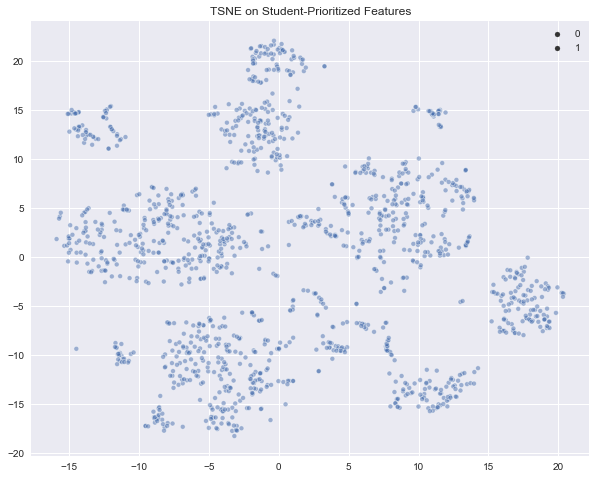

In [22]:
plt.rcParams.update({'figure.figsize': (10, 8)})
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], size = 1, alpha = 0.5, palette='rainbow')
plt.title('TSNE on Student-Prioritized Features');

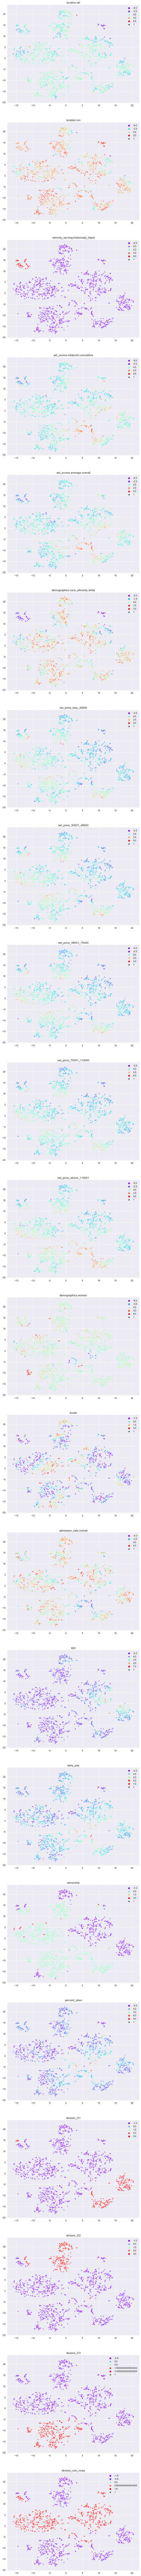

In [13]:
plt.rcParams.update({'figure.figsize': (10, 200)})
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], df_std[:, i], size = 1, alpha=0.5,
                        palette='rainbow')
    plt.title(f'{df.columns[i]}');